In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print('Loaded the libraries')

Loaded the libraries


In [2]:
# Read the dataset with the details of covid cases based on age group
notification_rate_dataset = pd.read_csv(r"Datasets\14_day_age_specific_notification_rate.csv")

In [3]:
# Filter the dataset to get the details of the children less than 15 years of age
child_dataset = notification_rate_dataset[notification_rate_dataset['age_group'] == '<15yr']

In [4]:
# A sneek-peek into the dataset
child_dataset.head()

,country,country_code,year_week,age_group,new_cases,population,source,rate_14_day_per_100k
0,Austria,AT,2020-09,<15yr,0,1278692,"TESSy COVID-19, national weekly data",NaN
1,Austria,AT,2020-10,<15yr,0,1278692,"TESSy COVID-19, national weekly data",NaN
2,Austria,AT,2020-11,<15yr,10,1278692,"TESSy COVID-19, national weekly data",0.8
3,Austria,AT,2020-12,<15yr,58,1278692,"TESSy COVID-19, national weekly data",5.3
4,Austria,AT,2020-13,<15yr,156,1278692,"TESSy COVID-19, national weekly data",16.7


#### Let's plot the dataset to get the count of new cases for each of the week.

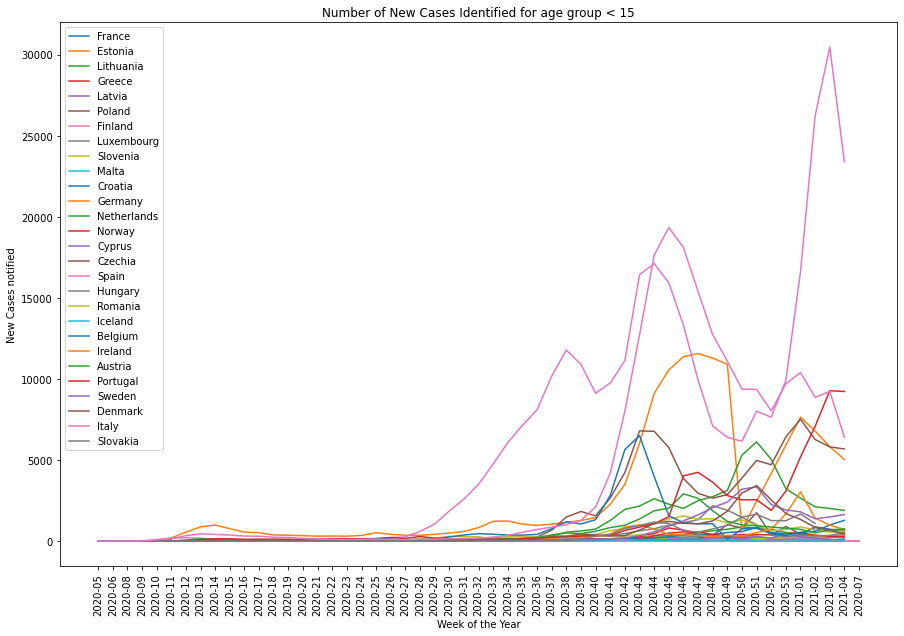

In [5]:
plt.figure(figsize=(15,10))
for country in set(child_dataset.country):
    country_child_dataset = child_dataset[child_dataset['country'] == country]
    plt.plot(country_child_dataset.year_week, country_child_dataset.new_cases, label = country)
    plt.xlabel('Week of the Year')
    plt.ylabel('New Cases notified')
    plt.title('Number of New Cases Identified for age group < 15')
    plt.xticks(rotation=90)
    plt.legend()

As we can see, there was no significant increase till week 26th of 2020, so let's plot the graph from where we see the increase in the number of cases for this case study.

In [6]:
# Manipulate the year_week column to seperate out the year and the week.
year = []
week = []
for yw in notification_rate_dataset.year_week:
    split_yw = yw.split('-')
    year.append(split_yw[0])
    week.append(split_yw[1])    

In [7]:
# Convert the data type to integer so that it is easy to performe arithematic operations and it to the existing dataset.
notification_rate_dataset['Year'] = pd.DataFrame(year, columns= ['Year'], dtype= 'int')
notification_rate_dataset['Week'] = pd.DataFrame(week, columns= ['Week'], dtype= 'int')

In [8]:
notification_rate_dataset.head()

,country,country_code,year_week,age_group,new_cases,population,source,rate_14_day_per_100k,Year,Week
0,Austria,AT,2020-09,<15yr,0,1278692,"TESSy COVID-19, national weekly data",NaN,2020,9
1,Austria,AT,2020-10,<15yr,0,1278692,"TESSy COVID-19, national weekly data",NaN,2020,10
2,Austria,AT,2020-11,<15yr,10,1278692,"TESSy COVID-19, national weekly data",0.8,2020,11
3,Austria,AT,2020-12,<15yr,58,1278692,"TESSy COVID-19, national weekly data",5.3,2020,12
4,Austria,AT,2020-13,<15yr,156,1278692,"TESSy COVID-19, national weekly data",16.7,2020,13


In [9]:
# Check the Data Types
notification_rate_dataset.dtypes

country                  object
country_code             object
year_week                object
age_group                object
new_cases                 int64
population                int64
source                   object
rate_14_day_per_100k    float64
Year                      int32
Week                      int32
dtype: object

#### Cool! We can see Year and Week added as column to the dataset successfully.

In [10]:
child_dataset = notification_rate_dataset[notification_rate_dataset['age_group'] == '<15yr']
child_dataset.head()

,country,country_code,year_week,age_group,new_cases,population,source,rate_14_day_per_100k,Year,Week
0,Austria,AT,2020-09,<15yr,0,1278692,"TESSy COVID-19, national weekly data",NaN,2020,9
1,Austria,AT,2020-10,<15yr,0,1278692,"TESSy COVID-19, national weekly data",NaN,2020,10
2,Austria,AT,2020-11,<15yr,10,1278692,"TESSy COVID-19, national weekly data",0.8,2020,11
3,Austria,AT,2020-12,<15yr,58,1278692,"TESSy COVID-19, national weekly data",5.3,2020,12
4,Austria,AT,2020-13,<15yr,156,1278692,"TESSy COVID-19, national weekly data",16.7,2020,13


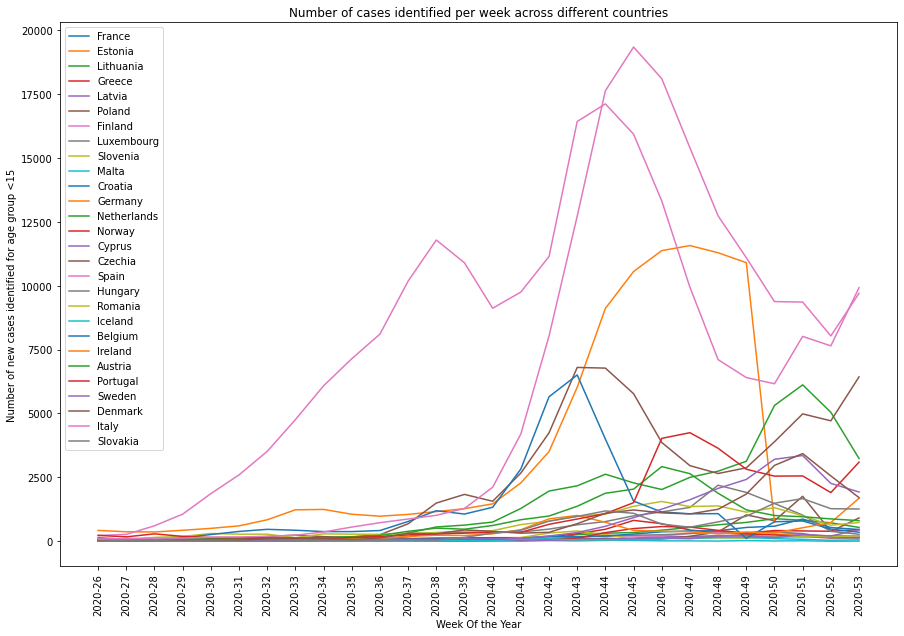

In [11]:
plt.figure(figsize=(15,10))
for country in set(child_dataset.country):
    country_child_dataset = child_dataset[(child_dataset['country'] == country) & (child_dataset['Year'] >= 2020) & (child_dataset['Week'] >= 26)]
    plt.plot(country_child_dataset.year_week, country_child_dataset.new_cases, label = country)
    plt.xticks(rotation=90)
    plt.xlabel('Week Of the Year')
    plt.ylabel('Number of new cases identified for age group <15')
    plt.title('Number of cases identified per week across different countries')
    plt.legend()

In [12]:
testing_dataset = pd.read_csv(r"Datasets\testing.csv")

In [13]:
testing_dataset.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W15,national,AT,Austria,1954,12339,8858775.0,139.285624,15.835967,Manual webscraping
1,Austria,AT,2020-W16,national,AT,Austria,773,58488,8858775.0,660.226724,1.321639,Manual webscraping
2,Austria,AT,2020-W17,national,AT,Austria,479,33443,8858775.0,377.512692,1.432288,Manual webscraping
3,Austria,AT,2020-W18,national,AT,Austria,349,26598,8858775.0,300.244673,1.312129,Country website
4,Austria,AT,2020-W19,national,AT,Austria,249,42153,8858775.0,475.833284,0.590705,Country website


In [14]:
test_year = []
test_week = []
for yw in testing_dataset.year_week:
    split_yw = yw.split('-')
    test_year.append(split_yw[0])
    test_week.append(split_yw[1][1:])

In [15]:
testing_dataset['Year'] = pd.DataFrame(test_year, columns= ['Year'], dtype= 'int')
testing_dataset['Week'] = pd.DataFrame(test_week, columns= ['Week'], dtype= 'int')

In [16]:
testing_dataset.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source,Year,Week
0,Austria,AT,2020-W15,national,AT,Austria,1954,12339,8858775.0,139.285624,15.835967,Manual webscraping,2020,15
1,Austria,AT,2020-W16,national,AT,Austria,773,58488,8858775.0,660.226724,1.321639,Manual webscraping,2020,16
2,Austria,AT,2020-W17,national,AT,Austria,479,33443,8858775.0,377.512692,1.432288,Manual webscraping,2020,17
3,Austria,AT,2020-W18,national,AT,Austria,349,26598,8858775.0,300.244673,1.312129,Country website,2020,18
4,Austria,AT,2020-W19,national,AT,Austria,249,42153,8858775.0,475.833284,0.590705,Country website,2020,19


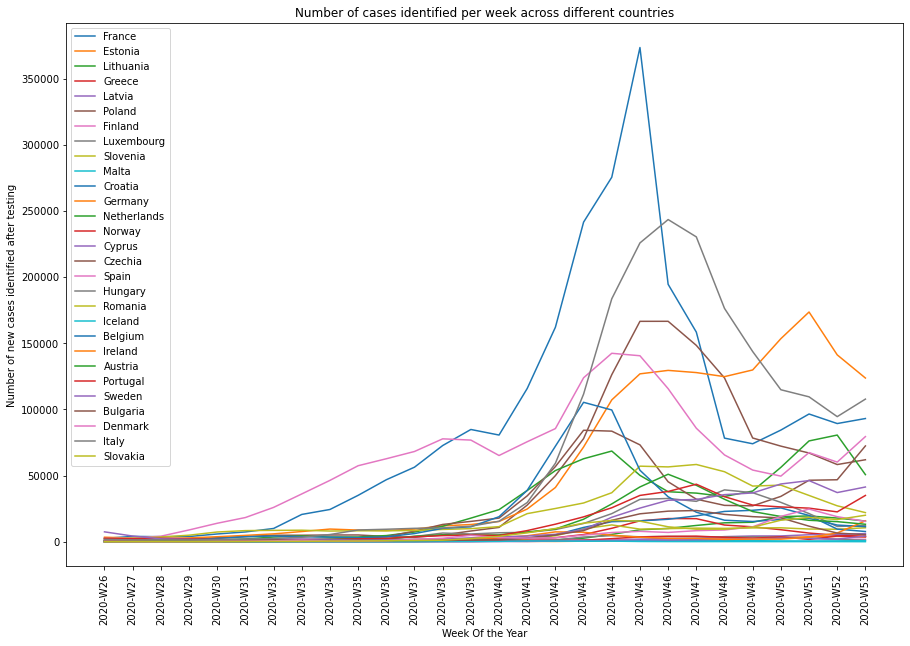

In [17]:
plt.figure(figsize=(15,10))
for country in set(testing_dataset.country):
    country_test_dataset = testing_dataset[(testing_dataset['country'] == country) & (testing_dataset['Year'] >= 2020) & (testing_dataset['Week'] >= 26) & (testing_dataset['level'] == 'national')]
    plt.plot(country_test_dataset.year_week, country_test_dataset.new_cases, label = country)
    plt.xticks(rotation=90)
    plt.xlabel('Week Of the Year')
    plt.ylabel('Number of new cases identified after testing')
    plt.title('Number of cases identified per week across different countries')
    plt.legend()

### Question : Understand the impact of covid on children in age group < 15 in Italy.What was the ratio in which there was increase in children testing positive for covid than to overall positive cases per week?

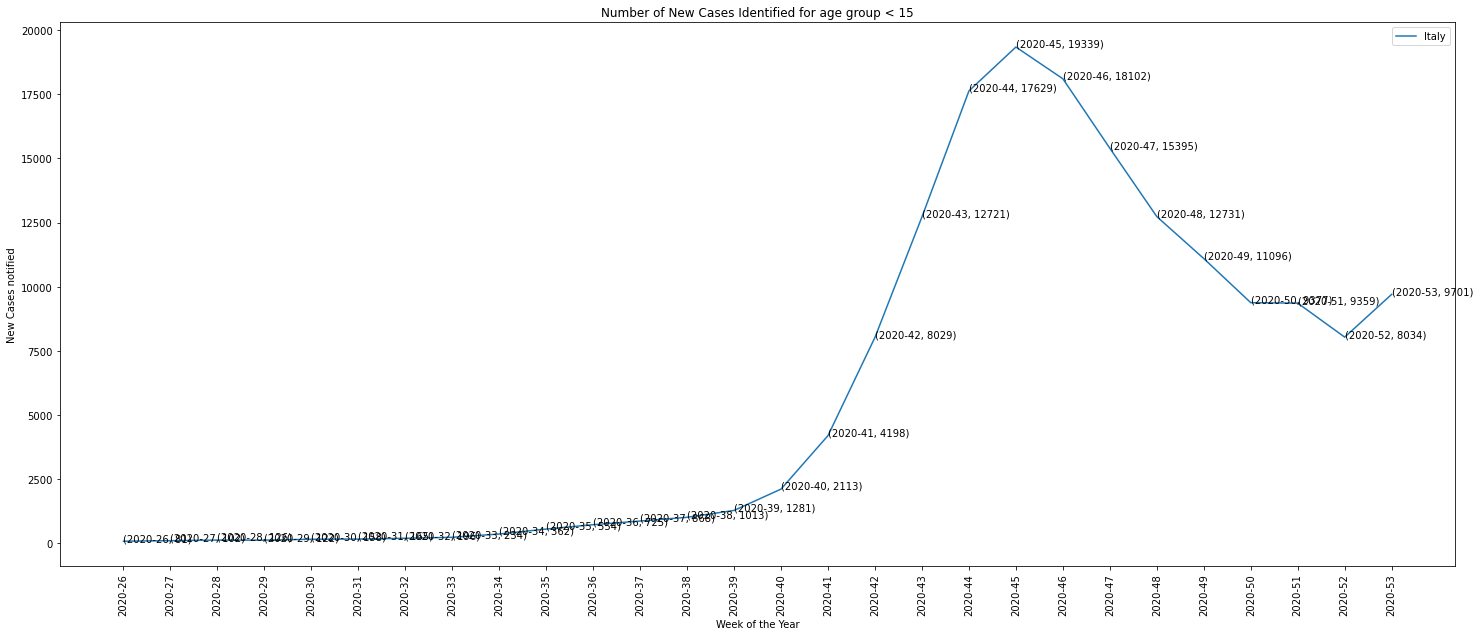

In [18]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
italy_dataset = child_dataset[(child_dataset['country'] == 'Italy') & (child_dataset['Year'] >= 2020) & (child_dataset['Week'] >= 26)]
plt.plot(italy_dataset.year_week, italy_dataset.new_cases, label = 'Italy')
plt.xlabel('Week of the Year')
plt.ylabel('New Cases notified')
plt.title('Number of New Cases Identified for age group < 15')
plt.xticks(rotation=90)
for xy in zip(italy_dataset.year_week, italy_dataset.new_cases):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
plt.legend()

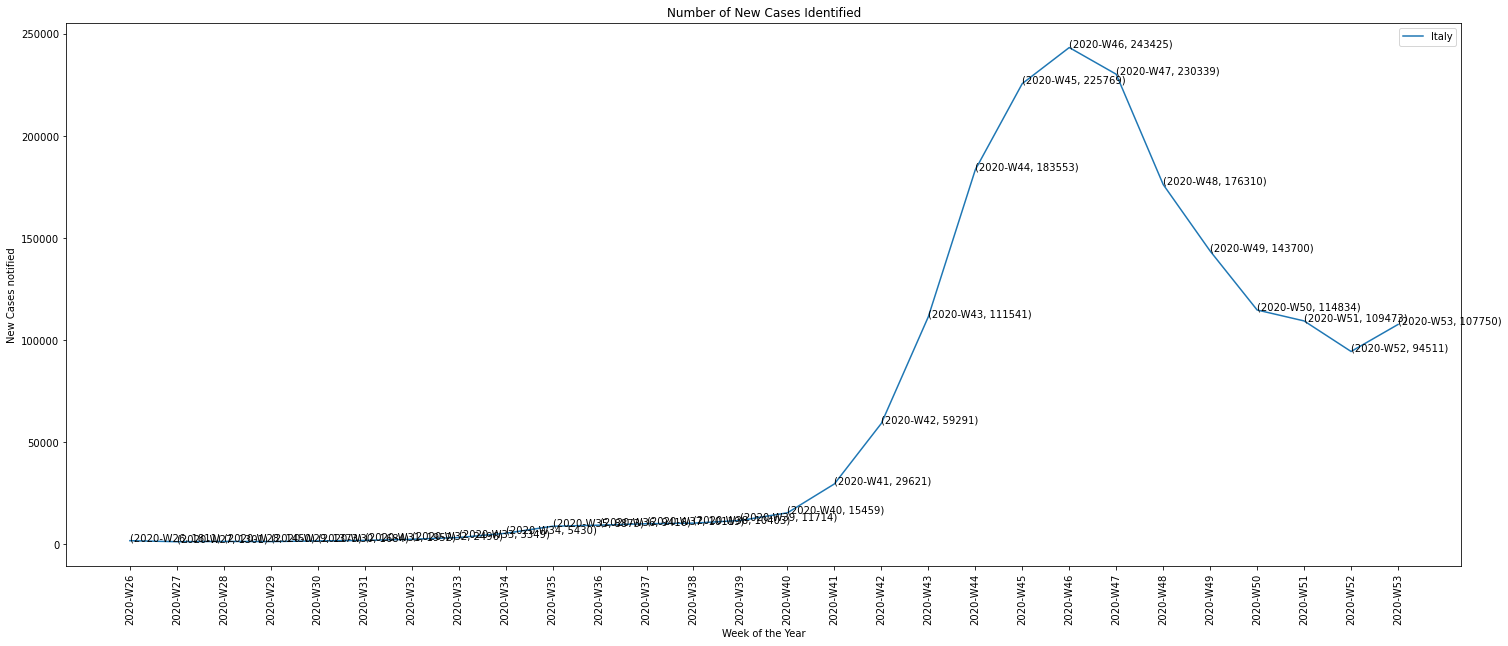

In [19]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
italy_testing_dataset = testing_dataset[(testing_dataset['country'] == 'Italy')]
italy_testing_dataset = italy_testing_dataset[(italy_testing_dataset['Year'] >= 2020)]
italy_testing_dataset = italy_testing_dataset[(italy_testing_dataset['Week'] >= 26)]
italy_testing_dataset = italy_testing_dataset[(italy_testing_dataset['level'] == 'national')]
plt.plot(italy_testing_dataset.year_week, italy_testing_dataset.new_cases, label = 'Italy')
plt.xlabel('Week of the Year')
plt.ylabel('New Cases notified')
plt.title('Number of New Cases Identified')
for xy in zip(italy_testing_dataset.year_week, italy_testing_dataset.new_cases):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.xticks(rotation=90)
plt.legend()

## Conclusion

We can clearly see that the increase in the number of children tested positive for coronavirus pandemic is in accordance with the increase in the overall cases. The graph for both children testing positive and overall positive cases is structurally similar.

Lets try to find how much times the per week increase in children testing positive is to the over all increase

In [20]:
# Reset Index
italy_testing_dataset.reset_index(inplace=True)
italy_dataset.reset_index(inplace= True)

In [21]:
# Create Empty Dataset
comparison_dataset = pd.DataFrame()

In [22]:
comparison_dataset['Overall_Cases'] = italy_testing_dataset['new_cases']

In [23]:
comparison_dataset['Children_Cases'] = italy_dataset['new_cases']

In [24]:
comparison_dataset['Ratio'] = italy_testing_dataset['new_cases']/italy_dataset['new_cases']

In [25]:
comparison_dataset

,Overall_Cases,Children_Cases,Ratio
0,1811,81,22.358025
1,1301,102,12.754902
2,1450,126,11.507937
3,1373,122,11.254098
4,1684,158,10.658228
5,1952,165,11.830303
6,2496,196,12.734694
7,3349,234,14.311966
8,5430,362,15.000000
9,8873,554,16.016245


In [26]:
comparison_dataset.Ratio.mean()

12.040008273360517

So, we can conclude everyweek from the overall increase per week, **~1/12** was the number of children testing positive for coronavirus.

## Future Works

1. Analyze the factors which lead to decrease in covid cases, basically government practices which helped reduce the cases and how the government policies worked for the children.
2. Analyze the impact on education sector as a whole because of covid.
3. Similar Study can be conducted for other countries as well.